In [29]:
import sys,os,dlib,glob,numpy
from skimage import io
import cv2
import imutils
from  matplotlib import pyplot as plt
%matplotlib inline

In [30]:
# 人臉68特徵點模型路徑
predictor_path = "../data/model/shape_predictor_68_face_landmarks.dat"

# 人臉辨識模型路徑
face_rec_model_path = "../data/model/dlib_face_recognition_resnet_model_v1.dat"

# 比對人臉圖片資料夾名稱
faces_folder_path = "./data"

# 需要辨識的人臉圖片名稱
img_path = "Hsieh.jpg"

In [31]:
# 載入人臉檢測器
detector = dlib.get_frontal_face_detector()

# 載入人臉特徵點檢測器
sp = dlib.shape_predictor(predictor_path)

# 載入人臉辨識檢測器
facerec = dlib.face_recognition_model_v1(face_rec_model_path)

# 比對人臉描述子列表
descriptors = []

# 比對人臉名稱列表
candidate = []

# 針對比對資料夾裡每張圖片做比對:
# 1.人臉偵測
# 2.特徵點偵測
# 3.取得描述子
for f in glob.glob(os.path.join(faces_folder_path, "*.jpg")):
    base = os.path.basename(f)
    # 依序取得圖片檔案人名
    candidate.append(os.path.splitext(base)[0])
    img = io.imread(f)
    # 1.人臉偵測
    dets = detector(img, 1)
    for k, d in enumerate(dets):
        # 2.特徵點偵測
        shape = sp(img, d)

        # 3.取得描述子，128維特徵向量
        face_descriptor = facerec.compute_face_descriptor(img, shape)

        # 轉換numpy array格式
        v = numpy.array(face_descriptor)
        descriptors.append(v)


In [32]:

# 針對需要辨識的人臉同樣進行處理
img = io.imread(img_path)
dets = detector(img, 1)

dist = []
for k, d in enumerate(dets):
    shape = sp(img, d)
    face_descriptor = facerec.compute_face_descriptor(img, shape)
    d_test = numpy.array(face_descriptor)

    x1 = d.left()
    y1 = d.top()
    x2 = d.right()
    y2 = d.bottom()
    # 以方框標示偵測的人臉
    cv2.rectangle(img, (x1, y1), (x2, y2), ( 0, 255, 0), 4, cv2. LINE_AA)

    # 計算歐式距離
    for i in descriptors:
        dist_ = numpy.linalg.norm(i -d_test)
        dist.append(dist_)


{'hank': 0.5534445055899034, 'tony': 0.5298249729567491, 'dawn': 0.5716814037904834, 'aaron': 0.5234615346629874, 'jeff': 0.672961374429506, 'jojo': 0.47686352226627193, 'bruce': 0.5210558255760137, 'paul': 0.5179976650500409, 'teacher': 0.35861626222584325, 'zong': 0.6783094358240621, 'tommy': 0.5688087678015871, 'kevin': 0.5480354504439137}
Sort: [('teacher', 0.35861626222584325), ('jojo', 0.47686352226627193), ('paul', 0.5179976650500409), ('bruce', 0.5210558255760137), ('aaron', 0.5234615346629874), ('tony', 0.5298249729567491), ('kevin', 0.5480354504439137), ('hank', 0.5534445055899034), ('tommy', 0.5688087678015871), ('dawn', 0.5716814037904834), ('jeff', 0.672961374429506), ('zong', 0.6783094358240621)]
Recognition test_img: teacher


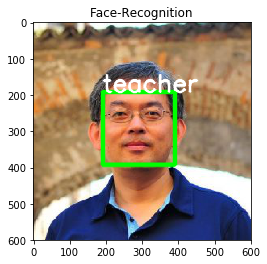

In [33]:
# 將比對人名和比對出來的歐式距離組成一個dict
c_d = dict( zip(candidate,dist))
print(c_d)

# 根據歐式距離由小到大排序
cd_sorted = sorted(c_d.items(), key = lambda d:d[1])
# 取得最短距離就為辨識出的人名
print('Sort:',cd_sorted)
rec_name = cd_sorted[0][0]
print('Recognition test_img:',rec_name)

# 將辨識出的人名印到圖片上面
cv2.putText(img, rec_name, (x1, y1), cv2. FONT_HERSHEY_SIMPLEX , 1, ( 255, 255, 255), 2, cv2. LINE_AA)

img = imutils.resize(img, width = 600)
#img = cv2.cvtColor(img,cv2. COLOR_BGR2RGB)
#img2 = img[:,:,::-1] 
plt.imshow(img)
plt.title('Face-Recognition')
plt.show()